In [35]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open('./ablation_metrics/1B_ablate.pickle', 'rb') as f:
    metrics1b = pickle.load(f)

with open('./ablation_metrics/1C_ablate.pickle', 'rb') as f:
    metrics1c = pickle.load(f)

with open('./ablation_metrics/2A_ablate.pickle', 'rb') as f:
    metrics2a = pickle.load(f)
with open('./ablation_metrics/2B_ablate.pickle', 'rb') as f:
    metrics2b = pickle.load(f)

with open('./ablation_metrics/1B_ablate_few_shot.pickle', 'rb') as f:
    fs1b = pickle.load(f)
with open('./ablation_metrics/1C_ablate_few_shot.pickle', 'rb') as f:
    fs1c = pickle.load(f)

In [3]:
mrrs = {}

for k, v in metrics1c.items():
    if k == 'last':
        k = 1000
    mrrs[int(k)] = v['MRR']

In [4]:
sorted(mrrs.items())

[(49, 0.42972301587301587),
 (99, 0.5055040043290043),
 (149, 0.49195000000000005),
 (199, 0.46718095238095236),
 (249, 0.4829170634920635),
 (299, 0.485475),
 (349, 0.5145373015873016),
 (399, 0.5049738095238095),
 (449, 0.5217178932178932),
 (499, 0.5013619047619047),
 (1000, 0.5013619047619047)]

In [5]:
metrics1c.pop('last')
metrics1b.pop('last')

{'MRR': 0.4445753968253969,
 'MAP': 0.2944284411884412,
 'P@1': 0.324,
 'P@3': 0.30066666666666664,
 'P@5': 0.2881,
 'P@15': 0.28752470584970585,
 'EnrichCorrectedMRR': 0.18612556144341286,
 'EnrichOriginalMRR': 0.15209647736263915,
 'R@1': 0.07990581224331222,
 'R@5': 0.2600812565773244,
 'R@10': 0.2874195872080463}

In [6]:
metrics1b['0'] = {'MRR': 0.014668}
metrics1c['0'] = {'MRR': 0.020819}
metrics2a['0'] = {'MRR': 0.412815}
metrics2b['0'] = {'MRR': 0.420314}


sota_1b = 0.2514
sota_1c = 0.3756
sota_2a = 0.64
sota_2b = 0.7724

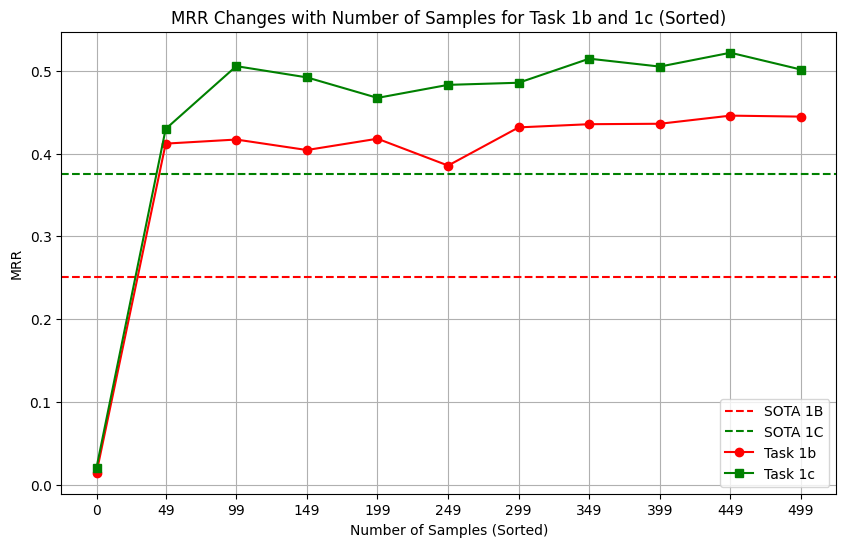

In [25]:
samples_sorted1 = sorted([int(sample) for sample in metrics1b.keys()])  # Sort sample sizes
mrr_values_1b_sorted = [metrics1b[str(sample)]['MRR'] for sample in samples_sorted1]
mrr_values_1c_sorted = [metrics1c[str(sample)]['MRR'] for sample in samples_sorted1]

# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_1b, color='r', linestyle='--', label='SOTA 1B')
plt.axhline(y=sota_1c, color='g', linestyle='--', label='SOTA 1C')

plt.plot(samples_sorted1, mrr_values_1b_sorted, label='Task 1b', marker='o', color='r')
plt.plot(samples_sorted1, mrr_values_1c_sorted, label='Task 1c', marker='s', color='g')
plt.xlabel('Number of Samples (Sorted)')
plt.ylabel('MRR')
plt.title('MRR Changes with Number of Samples for Task 1b and 1c (Sorted)')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted1)  # Ensure x-ticks are sorted
plt.show()

# 1 - 2 - 5 - 15 - 30 - 50

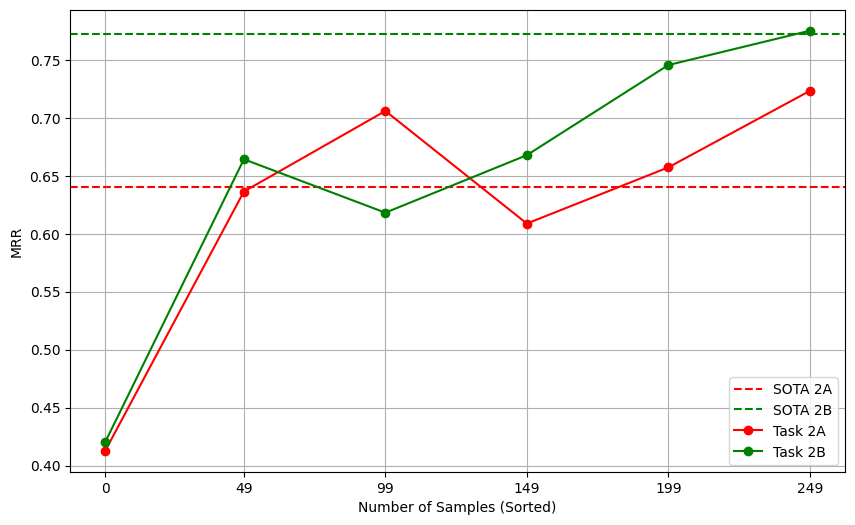

In [26]:
samples_sorted2 = sorted([int(sample) for sample in metrics2a.keys()])  # Sort sample sizes
mrr_values_2a_sorted = [metrics2a[str(sample)]['MRR'] for sample in samples_sorted2]
mrr_values_2b_sorted = [metrics2b[str(sample)]['MRR'] for sample in samples_sorted2]


# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_2a, color='r', linestyle='--', label='SOTA 2A')
plt.axhline(y=sota_2b, color='g', linestyle='--', label='SOTA 2B')


plt.plot(samples_sorted2, mrr_values_2a_sorted, label='Task 2A', marker='o', color='r')
plt.plot(samples_sorted2, mrr_values_2b_sorted, label='Task 2B', marker='o', color='g')
plt.xlabel('Number of Samples (Sorted)')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted2)  # Ensure x-ticks are sorted
plt.show()

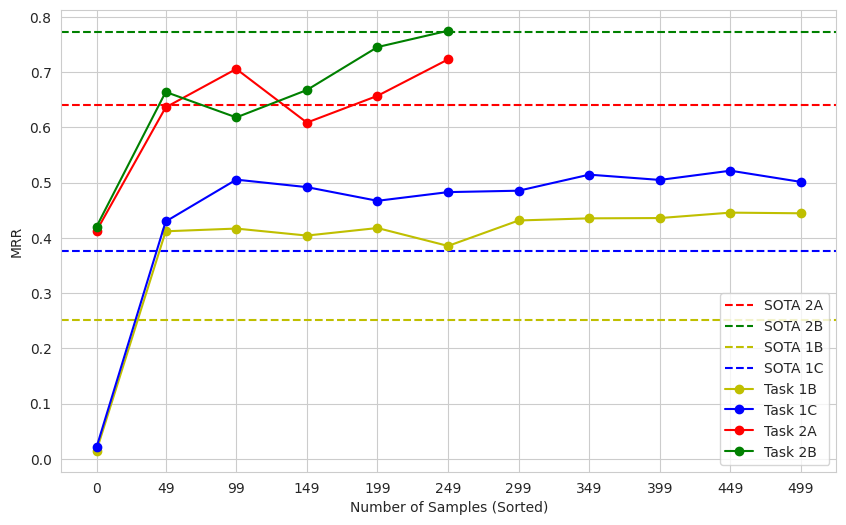

In [33]:
# samples_sorted2 = sorted([int(sample) for sample in metrics2a.keys()])  # Sort sample sizes
# mrr_values_2a_sorted = [metrics2a[str(sample)]['MRR'] for sample in samples_sorted2]
# mrr_values_2b_sorted = [metrics2b[str(sample)]['MRR'] for sample in samples_sorted2]

sns.set_style("whitegrid")
# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_2a, color='r', linestyle='--', label='SOTA 2A')
plt.axhline(y=sota_2b, color='g', linestyle='--', label='SOTA 2B')
plt.axhline(y=sota_1b, color='y', linestyle='--', label='SOTA 1B')
plt.axhline(y=sota_1c, color='b', linestyle='--', label='SOTA 1C')

plt.plot(samples_sorted1, mrr_values_1b_sorted, label='Task 1B', marker='o', color='y')
plt.plot(samples_sorted1, mrr_values_1c_sorted, label='Task 1C', marker='o', color='b')

plt.plot(samples_sorted2, mrr_values_2a_sorted, label='Task 2A', marker='o', color='r')
plt.plot(samples_sorted2, mrr_values_2b_sorted, label='Task 2B', marker='o', color='g')

plt.xlabel('Number of Samples (Sorted)')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted1)  # Ensure x-ticks are sorted
plt.show()

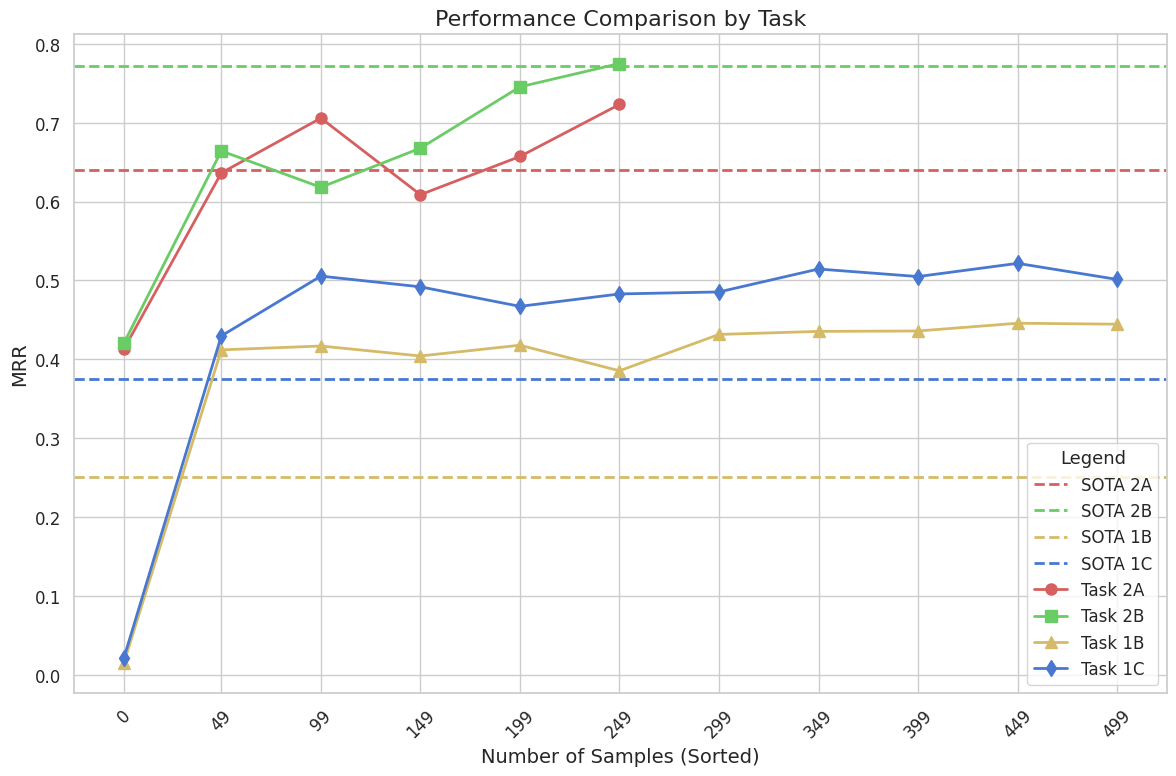

In [34]:
# Set the Seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Create a larger plot
plt.figure(figsize=(12, 8))

# State of the Art (SOTA) lines with improved readability
plt.axhline(y=sota_2a, color='r', linestyle='--', label='SOTA 2A', linewidth=2)
plt.axhline(y=sota_2b, color='g', linestyle='--', label='SOTA 2B', linewidth=2)
plt.axhline(y=sota_1b, color='y', linestyle='--', label='SOTA 1B', linewidth=2)
plt.axhline(y=sota_1c, color='b', linestyle='--', label='SOTA 1C', linewidth=2)

# Plot each task with a distinct marker and line style for clarity
plt.plot(samples_sorted2, mrr_values_2a_sorted, label='Task 2A', marker='o', linestyle='-', color='r', markersize=8, linewidth=2)
plt.plot(samples_sorted2, mrr_values_2b_sorted, label='Task 2B', marker='s', linestyle='-', color='g', markersize=8, linewidth=2)
plt.plot(samples_sorted1, mrr_values_1b_sorted, label='Task 1B', marker='^', linestyle='-', color='y', markersize=8, linewidth=2)
plt.plot(samples_sorted1, mrr_values_1c_sorted, label='Task 1C', marker='d', linestyle='-', color='b', markersize=8, linewidth=2)

# Enhancing the labels and title
plt.xlabel('Number of Samples (Sorted)', fontsize=14)
plt.ylabel('MRR', fontsize=14)
plt.title('Performance Comparison by Task', fontsize=16)

# Improving the legend
plt.legend(title='Legend', title_fontsize='13', fontsize='12', loc='best')

# Customize the tick parameters for readability
plt.xticks(samples_sorted1, fontsize=12, rotation=45)  # Adjust rotation if labels overlap
plt.yticks(fontsize=12)

# Optionally, tighten the layout to ensure everything fits without clipping
plt.tight_layout()

# Show the plot
plt.show()

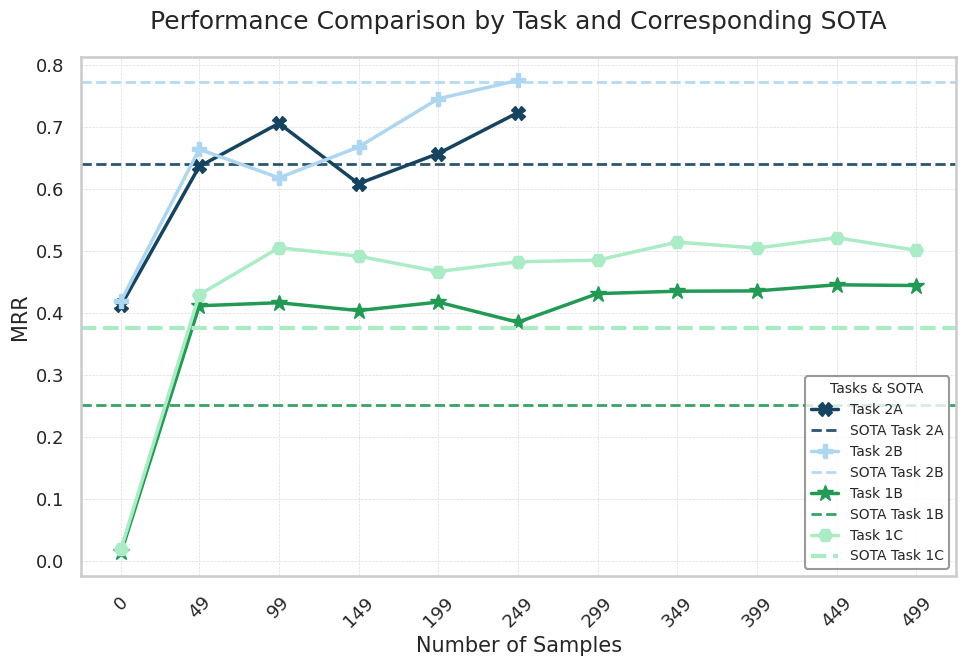

In [52]:
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

# Define a custom color palette for tasks and corresponding SOTA lines
# colors = {
#     'Task 2A': "#3498db",
#     'Task 2B': "#e74c3c",
#     'Task 1B': "#f39c12",  # Dark orange for better visibility
#     'Task 1C': "#1abc9c"   # Teal for distinct visibility
# }
colors = {
    'Task 2A': "#154360",  # Deep Blue
    'Task 2B': "#AED6F1",  # Very Light Blue
    'Task 1B': "#229954",  # Dark Green
    'Task 1C': "#ABEBC6"   # Light Green
}
sns.set_palette(sns.color_palette(list(colors.values())))

# Create the plot with adjusted aesthetics
plt.figure(figsize=(10, 7))

# Plot tasks with matching SOTA lines
for task, color in colors.items():
    if task == 'Task 2A':
        plt.plot(samples_sorted2, mrr_values_2a_sorted, label=task, marker='X', linestyle='-', linewidth=2.5, markersize=10, color=color)
        plt.axhline(y=sota_2a, color=color, linestyle='--', label=f'SOTA {task}', linewidth=2, alpha=0.9)
    elif task == 'Task 2B':
        plt.plot(samples_sorted2, mrr_values_2b_sorted, label=task, marker='P', linestyle='-', linewidth=2.5, markersize=10, color=color)
        plt.axhline(y=sota_2b, color=color, linestyle='--', label=f'SOTA {task}', linewidth=2, alpha=0.9)
    elif task == 'Task 1B':
        plt.plot(samples_sorted1, mrr_values_1b_sorted, label=task, marker='*', linestyle='-', linewidth=2.5, markersize=12, color=color)
        plt.axhline(y=sota_1b, color=color, linestyle='--', label=f'SOTA {task}', linewidth=2, alpha=0.9)
    elif task == 'Task 1C':
        plt.plot(samples_sorted1, mrr_values_1c_sorted, label=task, marker='H', linestyle='-', linewidth=2.5, markersize=10, color=color)
        plt.axhline(y=sota_1c, color=color, linestyle='--', label=f'SOTA {task}', linewidth=3, alpha=1)

# Customizing the plot further for clarity and aesthetics
plt.xlabel('Number of Samples', fontsize=15)
plt.ylabel('MRR', fontsize=15)
plt.title('Performance Comparison by Task and Corresponding SOTA', fontsize=18, pad=20)

# Adjusting ticks for better readability
plt.xticks(np.unique(samples_sorted1 + samples_sorted2), rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Improving the legend to clearly differentiate tasks and SOTA benchmarks
plt.legend(title='Tasks & SOTA', title_fontsize='10', fontsize='10', loc='best', frameon=True, edgecolor='gray')

# Ensuring the layout is tight so everything fits well
plt.tight_layout()

# Displaying the enhanced and intuitive plot
plt.show()

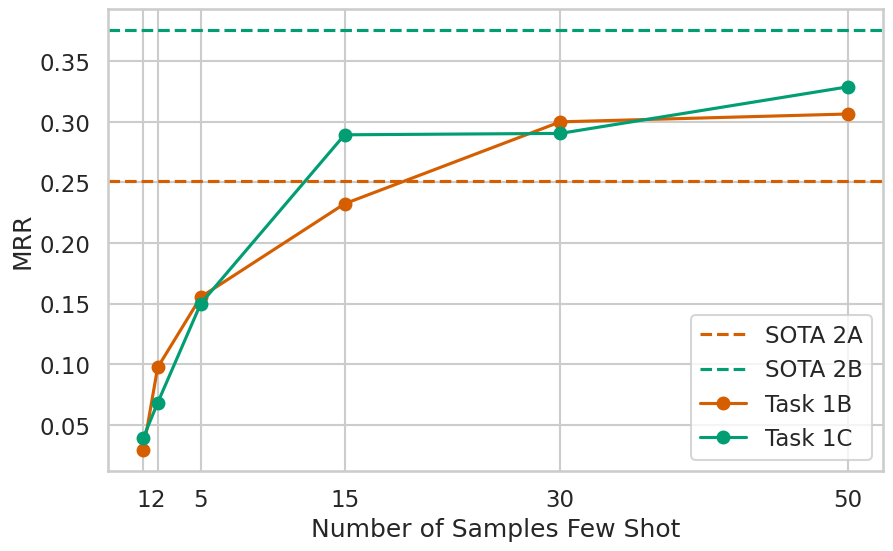

In [43]:
samples_sorted_f = sorted([int(sample) for sample in fs1b.keys()])  # Sort sample sizes
mrr_values_1b_fs = [fs1b[sample]['MRR'] for sample in samples_sorted_f]
mrr_values_1c_fs = [fs1c[sample]['MRR'] for sample in samples_sorted_f]


# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_1b, color='r', linestyle='--', label='SOTA 2A')
plt.axhline(y=sota_1c, color='g', linestyle='--', label='SOTA 2B')


plt.plot(samples_sorted_f, mrr_values_1b_fs, label='Task 1B', marker='o', color='r')
plt.plot(samples_sorted_f, mrr_values_1c_fs, label='Task 1C', marker='o', color='g')
plt.xlabel('Number of Samples Few Shot')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted)  # Ensure x-ticks are sorted
plt.show()

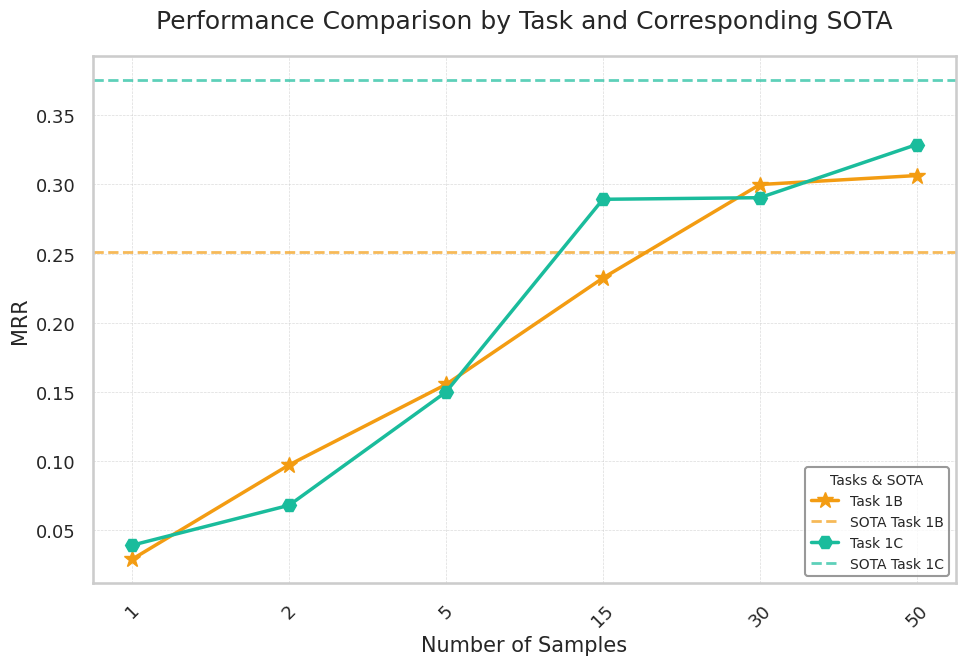

In [45]:
samples_sorted_f = np.array(samples_sorted_f).astype(str)

sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

# Define a custom color palette for tasks and corresponding SOTA lines
colors = {
    'Task 1B': "#f39c12",  # Dark orange for better visibility
    'Task 1C': "#1abc9c"   # Teal for distinct visibility
}
sns.set_palette(sns.color_palette(list(colors.values())))

# Create the plot with adjusted aesthetics
plt.figure(figsize=(10, 7))

# Plot tasks with matching SOTA lines
for task, color in colors.items():
    if task == 'Task 1B':
        plt.plot(samples_sorted_f, mrr_values_1b_fs, label=task, marker='*', linestyle='-', linewidth=2.5, markersize=12, color=color)
        plt.axhline(y=sota_1b, color=color, linestyle='--', label=f'SOTA {task}', linewidth=2, alpha=0.7)
    elif task == 'Task 1C':
        plt.plot(samples_sorted_f, mrr_values_1c_fs, label=task, marker='H', linestyle='-', linewidth=2.5, markersize=10, color=color)
        plt.axhline(y=sota_1c, color=color, linestyle='--', label=f'SOTA {task}', linewidth=2, alpha=0.7)

# Customizing the plot further for clarity and aesthetics
plt.xlabel('Number of Samples', fontsize=15)
plt.ylabel('MRR', fontsize=15)
plt.title('Performance Comparison by Task and Corresponding SOTA', fontsize=18, pad=20)

# Adjusting ticks for better readability
plt.xticks(np.unique(samples_sorted_f), rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Improving the legend to clearly differentiate tasks and SOTA benchmarks
plt.legend(title='Tasks & SOTA', title_fontsize='10', fontsize='10', loc='best', frameon=True, edgecolor='gray')

# Ensuring the layout is tight so everything fits well
plt.tight_layout()

# Displaying the enhanced and intuitive plot
plt.show()